In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# Define the number of inputs and outputs
out_nodes = 2
in_nodes = 2

model = Sequential()    # This function allows you to create a sequantial model (a stack) to which you can add as many dense layers as you wish.

# Define a hidden layer with single perceptron.
dense_layer = Dense(out_nodes, activation='sigmoid', kernel_initializer="Ones", bias_initializer="Ones")  # An activation function in a neural network provides non-linearity to the data which is important for learning features from the input data, else the learning will stop at a particular stage and leads to a dying neuron problem.

new_model=model.add(dense_layer)

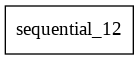

In [26]:
out_nodes = 2
in_nodes = 2

model = Sequential()    # This function allows you to create a sequantial model (a stack) to which you can add as many dense layers as you wish.

# Define a hidden layer with single perceptron.
dense_layer = Dense(out_nodes, activation='sigmoid', kernel_initializer="Ones", bias_initializer="Ones")  # An activation function in a neural network provides non-linearity to the data which is important for learning features from the input data, else the learning will stop at a particular stage and leads to a dying neuron problem.

model.add(dense_layer)
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

Multiple layers


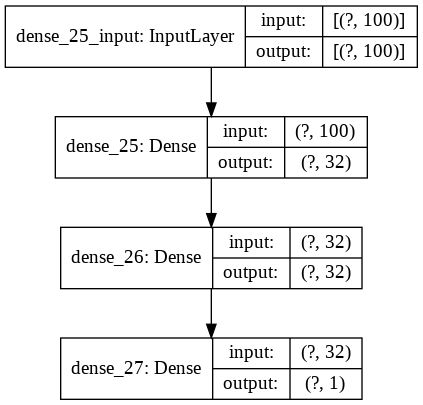

In [28]:
import numpy as np

# Generate some random data
train_data = np.random.random((1000, 100))
train_labels = np.random.randint(2, size=(1000, 1))
test_data = np.random.random((100, 100))
test_labels = np.random.randint(2, size=(100, 1))

units = 32

model = Sequential()

model.add(Dense(units, activation='relu', input_dim=100))       # Input dimension should be equal to the number of features
model.add(Dense(units, activation='relu'))

# The output should be a single outcome so one Dense layer is defined with a single unit.
model.add(Dense(1, activation='sigmoid'))

tf.keras.utils.plot_model(model, to_file="test.png", show_shapes=True)

In [29]:
from tensorflow.keras.optimizers import Adam, SGD, Adadelta, Adagrad, Adamax, Nadam, RMSprop

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
sgd = SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)
adad = Adadelta(lr=1.0,rho=0.95,epsilon=None,decay=0.0)
adag = Adagrad(lr=0.01,epsilon=None,decay=0.0)
adamax = Adamax(lr=0.002,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0)
nadam = Nadam(lr=0.002,beta_1=0.9,beta_2=0.999,epsilon=None,schedule_decay=0.004)
rms = RMSprop(lr=0.001,rho=0.9,epsilon=None,decay=0.0)

loss = ['sparse_categorical_crossentropy','mean_squared_error','mean_absolute_error',
        'categorical_crossentropy','categorical_hinge']

metrics = ['accuracy','precision','recall']

In [30]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])  

In [31]:
train_data

array([[0.7097869 , 0.28358862, 0.37281946, ..., 0.29439124, 0.1387593 ,
        0.98575681],
       [0.00123313, 0.82414286, 0.54459972, ..., 0.14506849, 0.61122037,
        0.34862357],
       [0.35809816, 0.82608828, 0.02435682, ..., 0.63838481, 0.52771871,
        0.53788226],
       ...,
       [0.73719556, 0.70557838, 0.85743713, ..., 0.06366587, 0.793041  ,
        0.32912819],
       [0.20334907, 0.01414528, 0.63822234, ..., 0.29361367, 0.59477049,
        0.29317162],
       [0.97292296, 0.09568053, 0.01943597, ..., 0.74112218, 0.86633632,
        0.51529039]])

In [32]:
history = model.fit(train_data, train_labels, epochs=30, batch_size=128)

Epoch 1/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.4810
Epoch 2/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.4840
Epoch 3/30
8/8 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.4880
Epoch 4/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4910
Epoch 5/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4880
Epoch 6/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4820
Epoch 7/30
8/8 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4820
Epoch 8/30
8/8 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4870
Epoch 9/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.4890
Epoch 10/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.4990
Epoch 11/30
8/8 [======================

In [33]:
_, train_acc = model.evaluate(train_data, train_labels, verbose=1)
_, test_acc = model.evaluate(test_data, test_labels, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

4/4 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.4800
Train: 0.542, Test: 0.480


In [34]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
mnist_fashion = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = mnist_fashion.load_data()

# split training set into training set and validation set using train_test_split provided by scikit-learn 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=77)

num_classes = 10   # The items in the dataset are to be classified into 1 of the 10 classes.

print(x_train.shape, x_val.shape, x_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(45000, 28, 28) (15000, 28, 28) (10000, 28, 28)


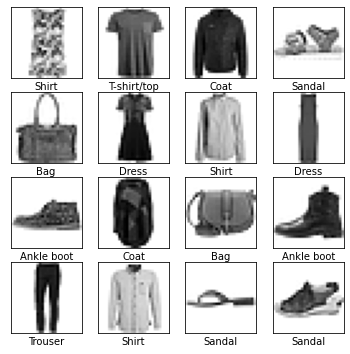

In [35]:
import matplotlib.pyplot as plt
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

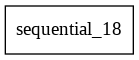

In [39]:
from tensorflow.keras.layers import Flatten

model = Sequential()
model.add(Flatten())  # This function flattens the input data

# Feel free to play around with different parameters here like number of units in each layer or switching the activation function or increasing/decreasing the number of layers.
model.add(Dense(512, activation='relu'))    

model.add(Dense(256, activation='relu')) 

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))   # The number of units in the last layer should always be the number of classes in which we have to classify our input data.
tf.keras.utils.plot_model(model, to_file="test2.png", show_shapes=True,expand_nested=True,)

In [40]:
model.compile(optimizer=adam, loss=loss[0], metrics=metrics[0])

In [42]:
batch_size = 128
epochs = 50

history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_val, y_val))  # You can set verbose to 1 to get the status of your model training, 2 to get one line per epoch, here I kept it 0 to keep the notebook precise. 

In [43]:

_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.4408 - accuracy: 0.8873
Train: 0.954, Test: 0.887


In [44]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

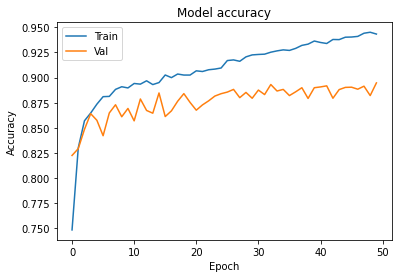

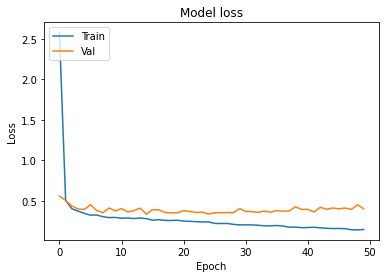

In [45]:
plot_history(history)

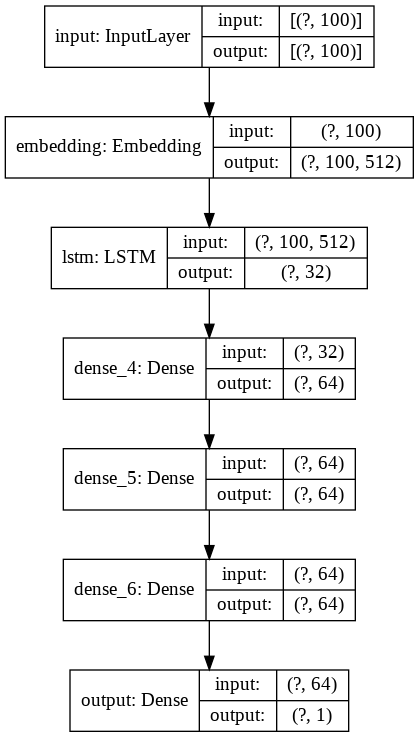

In [17]:
input = tf.keras.Input(shape=(100,), dtype='int32', name='input')
x = tf.keras.layers.Embedding(
    output_dim=512, input_dim=10000, input_length=100)(input)
x = tf.keras.layers.LSTM(32)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(x)
model = tf.keras.Model(inputs=[input], outputs=[output])
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)